In [13]:
import pandas as pd
import seaborn as sns
import numpy as np
sns.set_style('dark')
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

<h3>Read Data and discover its info</h3>

In [14]:
# Read Data
data = pd.read_csv('data/weatherAUS.csv')

# Show first 5 Rows from data.
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [15]:
# Check data dimensions.
# We have 145460 records with 22 independent variables and one dependent variable (RainTomorrow).
data.shape

(145460, 23)

In [16]:
#Check if data attributes have any NA values
data.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [17]:
# From the previous cell we can see that we have alot of NA values in dataset.
# And we have NA values in the dependent variable itself, so we need to remove this records from data.
data = data[data['RainTomorrow'].notna()]
data.shape

(142193, 23)

In [18]:
# Check percenatage of NA values in data attributes.
data.isnull().sum()/len(data)*100

Date              0.000000
Location          0.000000
MinTemp           0.447983
MaxTemp           0.226453
Rainfall          0.988797
Evaporation      42.789026
Sunshine         47.692924
WindGustDir       6.561504
WindGustSpeed     6.519308
WindDir9am        7.041838
WindDir3pm        2.656952
WindSpeed9am      0.948007
WindSpeed3pm      1.849599
Humidity9am       1.247600
Humidity3pm       2.538803
Pressure9am       9.855619
Pressure3pm       9.832411
Cloud9am         37.735332
Cloud3pm         40.152469
Temp9am           0.635756
Temp3pm           1.917113
RainToday         0.988797
RainTomorrow      0.000000
dtype: float64

In [19]:
# From previous cell we can see that Evaporation, Sunshine, Cloud9am and Cloud3pm
# have almost 50% of thier record missing which can have negative effect on our model.
data.drop(['Evaporation','Sunshine','Cloud9am','Cloud3pm'],axis=1,inplace=True)
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,No


In [20]:
numericCols = data.select_dtypes(include=["float64","int64"]).columns     # Numerical data attributes --> 12 Features
categoricalCols = data.select_dtypes(include="object").columns  # Categorical daata attributes --> 7 Features

# We can notice that we have Categorical data less than numerical.
print(numericCols)
print(categoricalCols)

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
       'Pressure3pm', 'Temp9am', 'Temp3pm'],
      dtype='object')
Index(['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm',
       'RainToday', 'RainTomorrow'],
      dtype='object')


In [21]:
# Check number of unique values in each categorical attribute to see if we can convert them into numerical.
# Only Date and Location attribute has many different values 3436 and 49 respectivly.
# But we can ignore Location column because it's implicitly defined by the other whether features, and doesn't give new info.
# The same is for Date each date entry is given by day-month-year which is implicitly defined by the other whether features.
for col in categoricalCols:
    print(f"{col}: {data[col].nunique()}")

# Remove flight column
data.drop(['Date','Location'],axis=1,inplace=True)

Date: 3436
Location: 49
WindGustDir: 16
WindDir9am: 16
WindDir3pm: 16
RainToday: 2
RainTomorrow: 2


In [22]:
data.head()

,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No
1,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No
2,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No
3,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,No
4,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,No


<h3>Visualize Data and Correlations</h3>

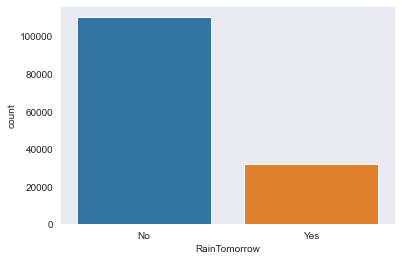

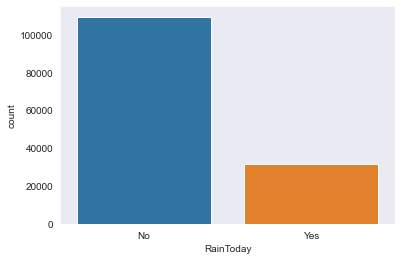

In [23]:
# See counts of each class for RainTomorrow in dataset.
plt.figure()
plt.subplot()
sns.countplot(x='RainTomorrow',data=data)
plt.show()
# We can see that data is unbalanced so maybe we need to do resampling.

# See counts of each class for RainToday in dataset.
plt.figure()
plt.subplot()
sns.countplot(x='RainToday',data=data)
plt.show()
# We can notice that RainTomorrow and RainToday has the same histogram, so maybe they affect each other.


In [24]:
# Convert Raintomorrow and RainToday attributes into numericals.
data['RainTomorrow'].replace(['No', 'Yes'],[0, 1], inplace=True)
data['RainToday'].replace(['No', 'Yes'],[0, 1], inplace=True)
data.head()

,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,0.0,0
1,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,0.0,0
2,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,0.0,0
3,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,0.0,0
4,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,0.0,0


<AxesSubplot:>

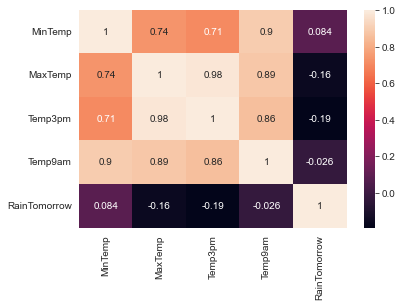

In [25]:
# Now lets analyze how temp. affect the probability of raining tomorrow.
# We have in our data 4 sources for temp (MaxTemp, MinTemp, Temp9am, Temp3pm)
# Lets how these values affect our target.
sns.heatmap(data[['MinTemp','MaxTemp','Temp3pm','Temp9am', 'RainTomorrow']].corr(), annot=True)

<AxesSubplot:>

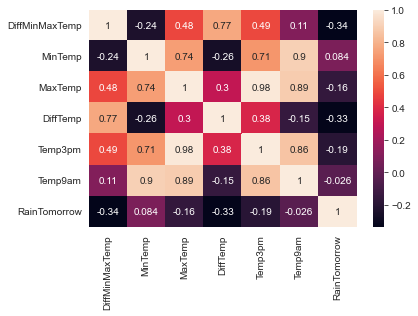

In [26]:
# After seeing the correlation matrix we can notice that these variables are not affect our target variable too much.
# But we can extract useful information from it by taking difference between the temps. 
data['DiffMinMaxTemp'] = data['MaxTemp'] - data['MinTemp']
data['DiffTemp'] = data['Temp3pm'] - data['Temp9am']
data[['DiffMinMaxTemp','MinTemp','MaxTemp','DiffTemp','Temp3pm','Temp9am', 'RainTomorrow']].corr()
sns.heatmap(data[['DiffMinMaxTemp','MinTemp','MaxTemp','DiffTemp','Temp3pm','Temp9am', 'RainTomorrow']].corr(), annot=True)


In [27]:
# Now we can see that we converted the unuseful variable to be more useful and more correlated to our target.
# Lets drop old variables
data.drop(['MinTemp','MaxTemp','Temp3pm','Temp9am','DiffTemp'],axis=1,inplace=True)
data.head()

,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,RainToday,RainTomorrow,DiffMinMaxTemp
0,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,0.0,0,9.5
1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,0.0,0,17.7
2,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,0.0,0,12.8
3,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,0.0,0,18.8
4,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,0.0,0,14.8


<AxesSubplot:>

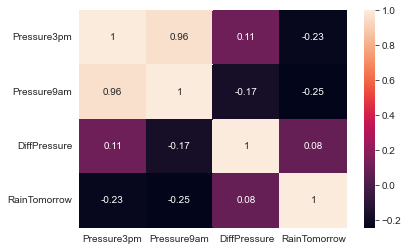

In [28]:
# Now lets analyze how the pressure affect the probability of raining tomorrow.
# We have in our data 2 sources for pressure (Pressure3pm, Pressure9am)
# Lets show how these values affect our target.
data['DiffPressure'] = data['Pressure3pm'] - data['Pressure9am']

sns.heatmap(data[['Pressure3pm','Pressure9am','DiffPressure', 'RainTomorrow']].corr(), annot=True)




In [29]:
# After seeing the correlation matrix for pressure with our target.
# We can say that the two variables affect it by almost the same way,
# but we can't extract new better feature as temp.
data.drop(['DiffPressure'],axis=1,inplace=True)
data.head()

,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,RainToday,RainTomorrow,DiffMinMaxTemp
0,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,0.0,0,9.5
1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,0.0,0,17.7
2,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,0.0,0,12.8
3,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,0.0,0,18.8
4,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,0.0,0,14.8


<AxesSubplot:>

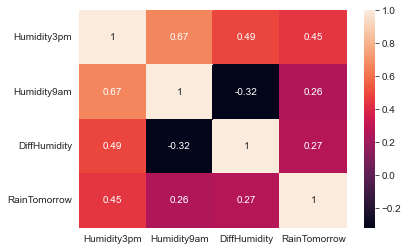

In [30]:
# Now lets analyze how the humidity affect the probability of raining tomorrow.
# We have in our data 2 sources for temp (Humidity3pm, Humidity9am)
# Lets show how these values affect our target.
data['DiffHumidity'] = data['Humidity3pm'] - data['Humidity9am']

sns.heatmap(data[['Humidity3pm','Humidity9am','DiffHumidity', 'RainTomorrow']].corr(), annot=True)

# We can see that Humidity3pm is the most feature affect our target,
# but the other two features affect also but with less effect.

              Rainfall  RainTomorrow
Rainfall      1.000000      0.239032
RainTomorrow  0.239032      1.000000


<AxesSubplot:ylabel='Rainfall'>

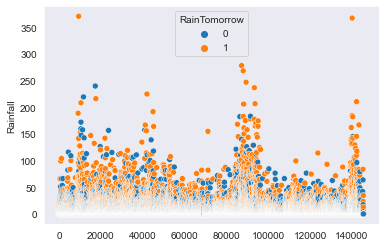

In [31]:
# Lets see if Rainfall affect our target value or not.
print(data[['Rainfall', 'RainTomorrow']].corr())
sns.scatterplot(x=data.index, y=data['Rainfall'], hue=data['RainTomorrow'])

# We can see that Rainfall affect our target slightly and we can notice that,
# for large values of rain fall the probability to raintomorrow increases wrt not to rain. 


In [32]:
# Lets see if RainToday affect our target value or not.
data[['RainToday', 'RainTomorrow']].corr()


,RainToday,RainTomorrow
RainToday,1.000000,0.313097
RainTomorrow,0.313097,1.000000


In [33]:
# Now lets analyze how the wind affect the probability of raining tomorrow.
# We have in our data 3 sources for temp (WindSpeed9am, WindSpeed3pm, WindGustSpeed)
# Lets show how these values affect our target.
data[['WindGustSpeed',	'WindSpeed9am',	'WindSpeed3pm', 'RainTomorrow']].corr()


,WindGustSpeed,WindSpeed9am,WindSpeed3pm,RainTomorrow
WindGustSpeed,1.000000,0.604837,0.686419,0.234010
WindSpeed9am,0.604837,1.000000,0.519971,0.090995
WindSpeed3pm,0.686419,0.519971,1.000000,0.087817
RainTomorrow,0.234010,0.090995,0.087817,1.000000


In [34]:
# We can see that only WindGustSpeed affect our target slightly.
data.drop(['WindSpeed9am',	'WindSpeed3pm'],axis=1,inplace=True)
data.head()

,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,RainToday,RainTomorrow,DiffMinMaxTemp,DiffHumidity
0,0.6,W,44.0,W,WNW,71.0,22.0,1007.7,1007.1,0.0,0,9.5,-49.0
1,0.0,WNW,44.0,NNW,WSW,44.0,25.0,1010.6,1007.8,0.0,0,17.7,-19.0
2,0.0,WSW,46.0,W,WSW,38.0,30.0,1007.6,1008.7,0.0,0,12.8,-8.0
3,0.0,NE,24.0,SE,E,45.0,16.0,1017.6,1012.8,0.0,0,18.8,-29.0
4,1.0,W,41.0,ENE,NW,82.0,33.0,1010.8,1006.0,0.0,0,14.8,-49.0


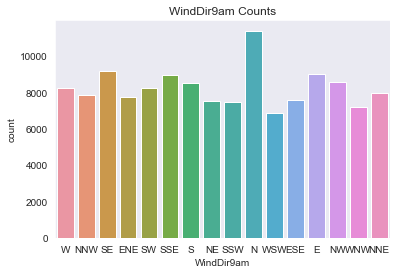

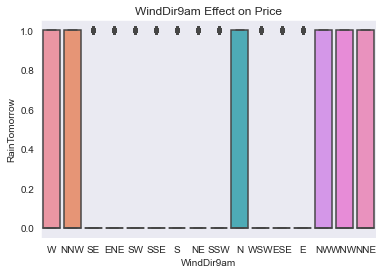

In [35]:
# See counts of each WindDir9am category in dataset.
plt.figure()
plt.title("WindDir9am Counts")
sns.countplot(x='WindDir9am',data=data)
plt.show()
# We can see that WindDir9am has many outliers, but also it can diffrentiate between classes.
plt.figure()
plt.title("WindDir9am Effect on Price")
sns.boxplot(x=data['WindDir9am'], y=data['RainTomorrow'])
plt.show()

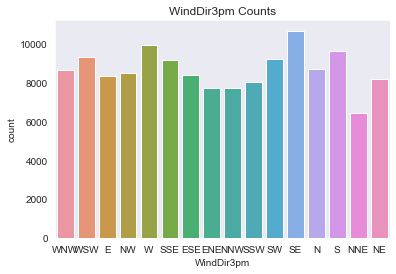

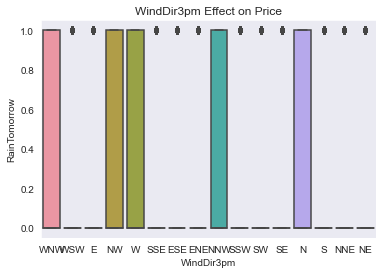

In [36]:
# See counts of each WindDir3pm category in dataset.
plt.figure()
plt.title("WindDir3pm Counts")
sns.countplot(x='WindDir3pm',data=data)
plt.show()
# We can see that WindDir3pm has many outliers, but also it can diffrentiate between classes.
plt.figure()
plt.title("WindDir3pm Effect on Price")
sns.boxplot(x=data['WindDir3pm'], y=data['RainTomorrow'])
plt.show()

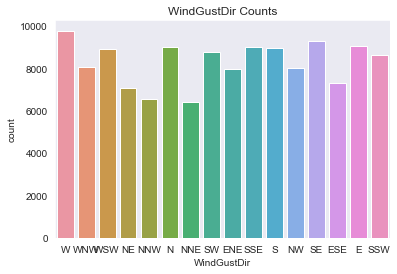

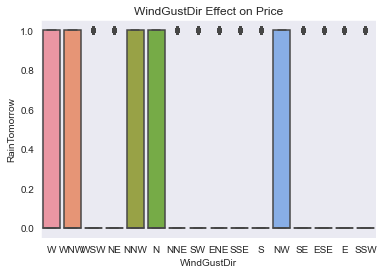

In [37]:

# See counts of each WindGustDir category in dataset.
plt.figure()
plt.title("WindGustDir Counts")
sns.countplot(x='WindGustDir',data=data)
plt.show()
# We can see that WindGustDir has many outliers, but also it can diffrentiate between classes.
plt.figure()
plt.title("WindGustDir Effect on Price")
sns.boxplot(x=data['WindGustDir'], y=data['RainTomorrow'])
plt.show()

In [38]:
# Convert WindDir9am into numerical attribute.
data["WindDir9am"] = data["WindDir9am"].astype('category')
data["WindDir9am"] = data["WindDir9am"].cat.codes

# Convert WindDir3pm into numerical attribute.
data["WindDir3pm"] = data["WindDir3pm"].astype('category')
data["WindDir3pm"] = data["WindDir3pm"].cat.codes

# Convert WindGustDir into numerical attribute.
data["WindGustDir"] = data["WindGustDir"].astype('category')
data["WindGustDir"] = data["WindGustDir"].cat.codes

data.head()


,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,RainToday,RainTomorrow,DiffMinMaxTemp,DiffHumidity
0,0.6,13,44.0,13,14,71.0,22.0,1007.7,1007.1,0.0,0,9.5,-49.0
1,0.0,14,44.0,6,15,44.0,25.0,1010.6,1007.8,0.0,0,17.7,-19.0
2,0.0,15,46.0,13,15,38.0,30.0,1007.6,1008.7,0.0,0,12.8,-8.0
3,0.0,4,24.0,9,0,45.0,16.0,1017.6,1012.8,0.0,0,18.8,-29.0
4,1.0,13,41.0,1,7,82.0,33.0,1010.8,1006.0,0.0,0,14.8,-49.0


<AxesSubplot:>

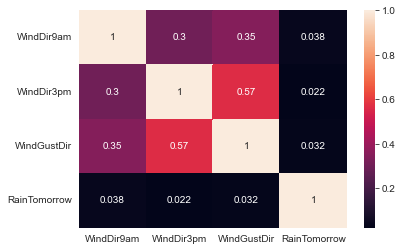

In [39]:
# Now lets see how each attribute affect our target.

sns.heatmap(data[['WindDir9am','WindDir3pm','WindGustDir', 'RainTomorrow']].corr(), annot=True)

# We can see that Wind direction info is not very important, it doesn't affect our target significantly.

In [40]:
# Winddir info has many outliers affect the model negativily
data.drop(['WindDir9am','WindDir3pm','WindGustDir'],axis=1,inplace=True)
data.head()

,Rainfall,WindGustSpeed,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,RainToday,RainTomorrow,DiffMinMaxTemp,DiffHumidity
0,0.6,44.0,71.0,22.0,1007.7,1007.1,0.0,0,9.5,-49.0
1,0.0,44.0,44.0,25.0,1010.6,1007.8,0.0,0,17.7,-19.0
2,0.0,46.0,38.0,30.0,1007.6,1008.7,0.0,0,12.8,-8.0
3,0.0,24.0,45.0,16.0,1017.6,1012.8,0.0,0,18.8,-29.0
4,1.0,41.0,82.0,33.0,1010.8,1006.0,0.0,0,14.8,-49.0


In [41]:
# Now fill the ramaining NA values in dataset by -100 value.
data.fillna(-100,inplace=True)
data.head()

,Rainfall,WindGustSpeed,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,RainToday,RainTomorrow,DiffMinMaxTemp,DiffHumidity
0,0.6,44.0,71.0,22.0,1007.7,1007.1,0.0,0,9.5,-49.0
1,0.0,44.0,44.0,25.0,1010.6,1007.8,0.0,0,17.7,-19.0
2,0.0,46.0,38.0,30.0,1007.6,1008.7,0.0,0,12.8,-8.0
3,0.0,24.0,45.0,16.0,1017.6,1012.8,0.0,0,18.8,-29.0
4,1.0,41.0,82.0,33.0,1010.8,1006.0,0.0,0,14.8,-49.0


<h3>Training and Model building</h3>

In [42]:
# Split independent and dependent variables
x = data.drop('RainTomorrow',axis=1)
y = data['RainTomorrow']

# Split data into training, validation and testing
X_train, X_test, y_train, y_test = train_test_split( x, y, test_size=0.2, random_state=8)

X_train, X_val, y_train, y_val = train_test_split( X_train, y_train, test_size=0.2, random_state=8)




In [43]:
#Apply Logistic regression 
LM = LogisticRegression(C=1.0, penalty='l1', solver='liblinear')
LM.fit(X_train, y_train)
accuracy = LM.score(X_test, y_test)
accuracy

0.8143043004325047

In [44]:
#Apply RandomForest
LM = RandomForestClassifier(max_depth= 100, max_features= 'log2', min_samples_leaf= 3, n_estimators= 1300)
LM.fit(X_train, y_train)
accuracy = LM.score(X_test, y_test)
accuracy

0.8464081015506875

In [45]:
#Apply DecisionTree
LM = DecisionTreeClassifier(criterion ='entropy', max_depth= 1300)
LM.fit(X_train, y_train)
accuracy = LM.score(X_test, y_test)
accuracy

0.7736910580540807

In [46]:
#Apply MLP
LM = MLPClassifier(activation= 'tanh', alpha= 0.0001, learning_rate= 'adaptive', solver= 'adam')
LM.fit(X_train, y_train)
accuracy = LM.score(X_test, y_test)
accuracy

0.8317099757375435

In [47]:
#Apply SVM
LM = SVC()
LM.fit(X_train, y_train)
accuracy = LM.score(X_test, y_test)
accuracy

0.7980238405007208

In [48]:
#Apply KNN
LM = KNeighborsClassifier(n_neighbors= 13, weights= 'distance')

LM.fit(X_train, y_train)
accuracy = LM.score(X_test, y_test)
accuracy

0.8384261049966595

<h3> Tune Hyper Parameters </h3>

In [49]:
%%NotUsed  # Line added to stop executing this cell

#Apply Logistic regression grid params
LM = LogisticRegression()

# grid search for LM 
params_LM = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C'      : np.arange(1,5,0.5),
    'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}
clf_LM  = GridSearchCV(LM,params_LM)

clf_LM.fit(X_val, y_val)
sorted(clf_LM.cv_results_.keys())
print(clf_LM.best_params_)


UsageError: Cell magic `%%NotUsed` not found.


In [50]:
%%NotUsed  # Line added to stop executing this cell

#Apply Random forest regression grid params
RF = RandomForestClassifier()

# grid search for RF 
params_RF = {
    'n_estimators': np.arange(100,1400,200),
    'max_depth'   : np.arange(100,300,100),
    'max_features': ['auto', 'sqrt', 'log2'],
    'min_samples_leaf': np.arange(1,4,1)
}
clf_RF  = GridSearchCV(RF,params_RF)

clf_RF.fit(X_val, y_val)
sorted(clf_RF.cv_results_.keys())
print(clf_RF.best_params_)

UsageError: Cell magic `%%NotUsed` not found.


In [51]:
%%NotUsed  # Line added to stop executing this cell

#Apply Decision tree regression grid params
DT = DecisionTreeClassifier()

# grid search for DT
params_DT = {
    'max_depth'   : np.arange(100,1800,100),
    'criterion'   : ['gini', 'entropy'],
}
clf_DT  = GridSearchCV(DT,params_DT)

clf_DT.fit(X_val, y_val)
sorted(clf_DT.cv_results_.keys())
print(clf_DT.best_params_)

UsageError: Cell magic `%%NotUsed` not found.


In [52]:
%%NotUsed  # Line added to stop executing this cell

#Apply MLP regression grid params
MLP = MLPClassifier()

# grid search for MLP 
params_MLP = {
    'activation'        : ['tanh', 'relu'],
    'solver'            : ['sgd', 'adam'],
    'learning_rate'     : ['constant', 'adaptive'],
    'alpha'             : [0.0001, 0.05],
}
clf_MLP  = GridSearchCV(MLP,params_MLP)

clf_MLP.fit(X_val, y_val)
sorted(clf_MLP.cv_results_.keys())
print(clf_MLP.best_params_)

UsageError: Cell magic `%%NotUsed` not found.


In [53]:
%%NotUsed  # Line added to stop executing this cell

#Apply SVM regression grid params
SVM = SVC()

# grid search for SVM 
params_SVM = {
    'C'        : np.arange(1,3,1),
    'kernel'   : ['linear', 'poly', 'rbf', 'sigmoid', 'precomputed'],
    'gamma'    : ['scale', 'auto'] 
}
clf_SVM  = GridSearchCV(SVM,params_SVM)

clf_SVM.fit(X_val, y_val)
sorted(clf_SVM.cv_results_.keys())
print(clf_SVM.best_params_)

UsageError: Cell magic `%%NotUsed` not found.


In [54]:
%%NotUsed  # Line added to stop executing this cell

#Apply KNN regression grid params
KNN = KNeighborsClassifier()

# grid search for KNN
params_KNN = {
    'n_neighbors'      : np.arange(3,15,1), 
    'weights'           : ['uniform', 'distance']
}
clf_KNN  = GridSearchCV(KNN,params_KNN)

clf_KNN.fit(X_val, y_val)
sorted(clf_KNN.cv_results_.keys())
print(clf_KNN.best_params_)

UsageError: Cell magic `%%NotUsed` not found.


<h3> Resampling </h3>

In [55]:
%%NotUsed  # Line added to stop executing this cell

# Because Data is unbalanced we will apply resampling. (Unused)
train_data = X_train.join(y_train)
train_data_class_0 = train_data[train_data['RainTomorrow']==0]
train_data_class_1 = train_data[train_data['RainTomorrow']==1]

# Downsampling
train_data_class_0_undersampling = train_data_class_0.sample(train_data_class_1['RainTomorrow'].count(),random_state=40)
train_data_undersampling = pd.concat([train_data_class_0_undersampling, train_data_class_1], axis=0)
X_train_down = train_data_undersampling.drop('RainTomorrow', axis=1)
y_train_down = train_data_undersampling['RainTomorrow']

# Oversampling
train_data_class_1_oversampling = train_data_class_1.sample(train_data_class_0['RainTomorrow'].count(),replace=True, random_state=40)
train_data_oversampling = pd.concat([train_data_class_1_oversampling, train_data_class_0], axis=0)
X_train_over = train_data_oversampling.drop('RainTomorrow', axis=1)
y_train_over = train_data_oversampling['RainTomorrow']

UsageError: Cell magic `%%NotUsed` not found.


In [56]:
# Unused
%%NotUsed  # Line added to stop executing this cell
selector = SelectKBest( k=3)
selector.fit(X_train, y_train)
X_train.columns[selector.get_support(indices=True)].tolist()
X_train = X_train[['Humidity3pm', 'DiffMinMaxTemp', 'Pressure9am']]
X_test = X_test[['Humidity3pm', 'DiffMinMaxTemp', 'Pressure9am']]


UsageError: Line magic function `%%NotUsed` not found.
